<a href="https://colab.research.google.com/github/FransAlex/MACHINE-LEARNING/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


In [46]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("HeartDisease.csv")  # Sesuai nama file yang diunggah


Saving HeartDisease.csv to HeartDisease (2).csv


In [49]:
import os

# Cek lokasi file setelah diunggah
print(os.listdir("/content"))


['.config', 'HeartDisease.csv', 'HeartDisease (1).csv', 'HeartDisease (2).csv', 'sample_data']


In [50]:
file_path = "/content/HeartDisease.csv"


In [51]:
import pandas as pd

df = pd.read_csv(file_path)
print("Dataset berhasil dimuat!")


Dataset berhasil dimuat!


In [52]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [53]:
df = df.fillna(df.mean())  # Mengisi nilai kosong dengan rata-rata


In [54]:
print(df[target].value_counts())


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


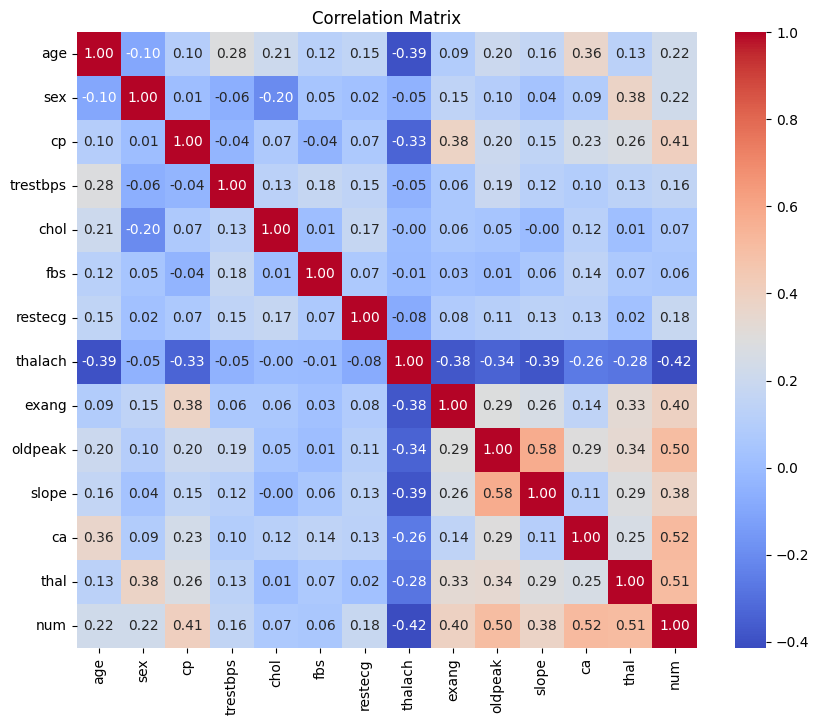

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [57]:
model = LogisticRegression(max_iter=2000, solver='saga', multi_class='ovr')


In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
print("Shape y_pred_proba:", y_pred_proba.shape)
print("Unique y_test values:", np.unique(y_test))


Shape y_pred_proba: (61,)
Unique y_test values: [0 1 2 3 4]


In [62]:
print("Shape y_pred_proba:", y_pred_proba.shape)  # Seharusnya (61, 5)
print("First 5 predictions:", y_pred_proba[:5])  # Cek isinya


Shape y_pred_proba: (61,)
First 5 predictions: [0.13707206 0.22433165 0.20421585 0.14181281 0.23768678]


In [63]:
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')


In [64]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')


In [65]:
print("Shape y_pred_proba:", y_pred_proba.shape)  # Seharusnya (61, 5)
print("First 5 predictions:", y_pred_proba[:5])  # Cek isinya


Shape y_pred_proba: (61,)
First 5 predictions: [0.13707206 0.22433165 0.20421585 0.14181281 0.23768678]


In [66]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')


In [67]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')


In [68]:
print("Shape y_pred_proba:", y_pred_proba.shape)  # Harus (61, 5) jika ada 5 kelas
print("Unique y_test values:", np.unique(y_test))  # Pastikan labelnya benar


Shape y_pred_proba: (61,)
Unique y_test values: [0 1 2 3 4]


In [70]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')


Kolom dalam dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Kolom setelah normalisasi: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

=== Hasil Evaluasi Model ===
Akurasi: 0.7541
Presisi: 0.7600
Recall: 0.6786
F1-Score: 0.7170
AUC-ROC: 0.7857


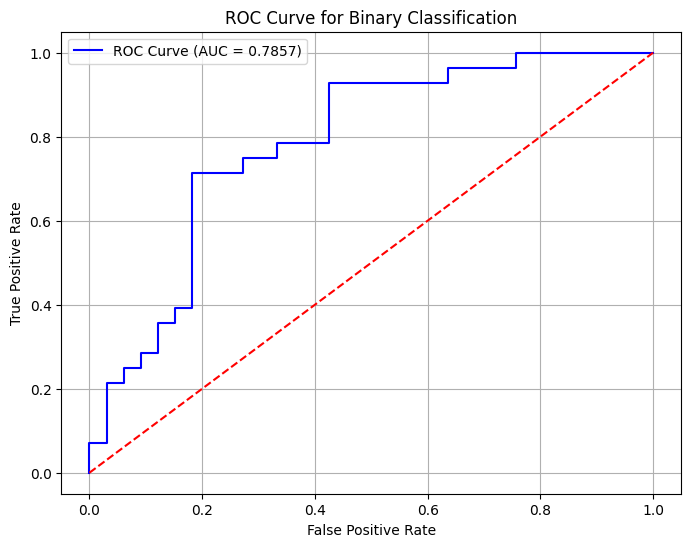

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
file_path = "/content/HeartDisease (2).csv"  # Sesuaikan dengan lokasi file

df = pd.read_csv(file_path)

# Tampilkan nama kolom untuk memastikan tidak ada kesalahan
print("Kolom dalam dataset:", df.columns)

# Normalisasi nama kolom agar tidak ada masalah spasi atau kapital
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
print("Kolom setelah normalisasi:", df.columns)

# Ubah target menjadi biner (0: Tidak ada penyakit jantung, 1: Ada penyakit jantung)
df['num'] = (df['num'] > 0).astype(int)

# Pilih fitur dan target
features = ["chol", "trestbps", "thalach"]  # Sesuai dengan dataset
target = "num"  # Sesuai dengan dataset

# Periksa apakah fitur dan target ada dalam dataset
missing_features = [col for col in features if col not in df.columns]
if missing_features:
    raise KeyError(f"Fitur berikut tidak ditemukan dalam dataset: {missing_features}")

if target not in df.columns:
    raise KeyError(f"Kolom target '{target}' tidak ditemukan dalam dataset")

X = df[features]
y = df[target]

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Buat model Logistic Regression
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Hanya ambil probabilitas kelas 1

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Tampilkan hasil evaluasi
print("\n=== Hasil Evaluasi Model ===")
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classification")
plt.legend()
plt.grid(True)
plt.show()
